# Dataproject of the employmentrate in the danish municipalities

In this dataproject we will describe and analyse the employment rate of the danish municipalities in the period 2008-2018. We will, among other things, analyse the correlation between the employment rate and disposable income in the municipalities together with the correlation between the employment rate and the accidents ratio.
Thus the goal of the project is to come up with different possible explanations to why the employment rate in the danish municipalities is different. We are aware that we cannot based on the analyse, say anything about the causality - to do that we need to perform regressions.
We start by importing and the needed packages; for then to turn to the cleaning proces of the datasets of the variables: Employmentrate, Accidents. 
Finally we will analyse the correlation mentioned above graphically.


1. **Importing needed packages**

***Note*** : Before procedeeing, make sure you have acces to the data used in this project; you will need to instal: pip install git+https://github.com/elben10/pydst in ypur Anaconda Prompt.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
import B_funktioner
import pydst as pydst
dst = pydst.Dst(lang='en')



2. **Cleaning process**

This first section collects datasets from DST and cleans in order to get the wanted variables
Collection of datasets and cleaning. To get an overview of which variables are contained in each datasetWe we start by running the following lines separately. Every dataset is divided into the danish municipalities.

(Tænker at dette skal gøres mere udførligt osv. Det er bare lige for vores eget overbliks skyld
Måske skal vi overveje at have helt i starten noget der undersøger hvilke datasæt vi vil hente ala nedenstående)

In [2]:
#Running this line gives an overview of the datasets in: Statistics Denmark
dst.get_subjects()

#The dataset of the population size
dst.get_tables(subjects=['02']).head(10)
dst.get_variables(table_id = 'FOLK1A')

#The dataset of the employment rate
dst.get_tables(subjects=['14']).head(10)
dst.get_variables(table_id = 'RAS200')

#The dataset of the number of accidents
dst.get_tables(subjects=['14']).head(10)
dst.get_variables(table_id = 'UHELDK7')

#The dataset of immigrants
dst.get_tables(subjects=['14']).head(10)
dst.get_variables(table_id = 'FOLK1E')

#The dataset of the number of sentences
dst.get_tables(subjects=['14']).head(10)
dst.get_variables(table_id = 'STRAF41')

#The datset of the disposable income
dst.get_tables(subjects=['14']).head(10)
dst.get_variables(table_id='INDKP107')




,id,text,elimination,time,map,values
0,OMRÅDE,region,True,False,denmark_municipality_07,"[{'id': '000', 'text': 'All Denmark'}, {'id': ..."
1,ENHED,unit,False,False,NaN,"[{'id': '101', 'text': 'People with type of in..."
2,KOEN,sex,True,False,NaN,"[{'id': 'MOK', 'text': 'Men and women, total'}..."
3,UDDNIV,level of education,False,False,NaN,"[{'id': '10', 'text': '10 BASIC SCHOOL 8-10 gr..."
4,INDKOMSTTYPE,type of income,False,False,NaN,"[{'id': '100', 'text': '1 Disposable income (2..."
5,Tid,time,False,True,NaN,"[{'id': '2004', 'text': '2004'}, {'id': '2005'..."


In [3]:
#Downloading the population data of the danish municipalities (*note* the structure is almost identical for the ofther datasets, why the same code will not be explanied every time)

variables = {'OMRÅDE':['*'],'Tid':['*']} #Hvorfor kører vi denne først??? - den siger vel ikke noget?
#Downloading and defining the dataset for the population of the danish municipalities
pop = dst.get_data(table_id = 'FOLK1A', variables=variables)

#Using the functions made in [dataproject.py] to clean and sort the dataset
pop = B_funktioner.initial_rename(pop,'population')
pop = B_funktioner.only_keep_municipalities_and_years(pop,0,2008,2018)
pop = B_funktioner.sort_reset(pop)
print(pop)

# Deleting unnecessary colunms, which we are not going to use
del pop['KØN']
del pop['ALDER']
del pop['CIVILSTAND']
pop


municipality  year    KØN  ALDER CIVILSTAND  population
0        Aabenraa  2008  Total  Total      Total       60189
1        Aabenraa  2009  Total  Total      Total       60392
2        Aabenraa  2010  Total  Total      Total       59978
3        Aabenraa  2011  Total  Total      Total       59795
4        Aabenraa  2012  Total  Total      Total       59600
...           ...   ...    ...    ...        ...         ...
1062          Ærø  2014  Total  Total      Total        6393
1063          Ærø  2015  Total  Total      Total        6276
1064          Ærø  2016  Total  Total      Total        6290
1065          Ærø  2017  Total  Total      Total        6177
1066          Ærø  2018  Total  Total      Total        6178

[1067 rows x 6 columns]


,municipality,year,population
0,Aabenraa,2008,60189
1,Aabenraa,2009,60392
2,Aabenraa,2010,59978
3,Aabenraa,2011,59795
4,Aabenraa,2012,59600
...,...,...,...
1062,Ærø,2014,6393
1063,Ærø,2015,6276
1064,Ærø,2016,6290
1065,Ærø,2017,6177


In [4]:
#Downloading the employment data of the danish municipalities

variables={'OMRÅDE':['*'], 'BEREGNING':['*'], 'TID':['*']} #Igen hvad gør denne linje?? 
#downloading and defining the employment data of the danish municipalities
empl = dst.get_data(table_id = 'RAS200', variables=variables)

#Using the functions made in [dataproject.py]:
empl = B_funktioner.initial_rename(empl,'employment rate')
empl = B_funktioner.only_keep_municipalities_and_years(empl,0,2008,2018)
#empl = B_funktioner.row_chooser(empl,BEREGNING,'Employment rate')
#Hvorfor er den ovenfor med #?
print(empl)

#As we will only examine the employment rate we make use of the following for-loop to eliminate the rows containing data of the "Economic activity rate" 
for val in ['Employment rate']: 
    I = empl.BEREGNING.str.contains(val)
    empl = empl.loc[I == True] # Deleting everything else than the : "Employment rate"
print(empl) 

#Sorting the table:
empl= B_funktioner.sort_reset(empl)

#Skal nedenstående med????
#Deleting columns for which we will not examine.
#del empl['KØN']
#del empl['ALDER']
#del empl['HERKOMST']
#del empl['BEREGNING']


empl



municipality               BEREGNING  year HERKOMST       ALDER    KØN  \
0              Køge         Employment rate  2011    Total  Age, total  Total   
1              Køge         Employment rate  2012    Total  Age, total  Total   
2              Køge         Employment rate  2013    Total  Age, total  Total   
3              Køge         Employment rate  2014    Total  Age, total  Total   
4           Rødovre         Employment rate  2011    Total  Age, total  Total   
...             ...                     ...   ...      ...         ...    ...   
2547    Brønderslev  Economic activity rate  2018    Total  Age, total  Total   
2548      Silkeborg         Employment rate  2018    Total  Age, total  Total   
2549      Silkeborg  Economic activity rate  2018    Total  Age, total  Total   
2550  Frederikshavn         Employment rate  2018    Total  Age, total  Total   
2551  Frederikshavn  Economic activity rate  2018    Total  Age, total  Total   

      employment rate  
0         

,municipality,BEREGNING,year,HERKOMST,ALDER,KØN,employment rate
0,Aabenraa,Employment rate,2008,Total,"Age, total",Total,74.6
1,Aabenraa,Employment rate,2009,Total,"Age, total",Total,71.6
2,Aabenraa,Employment rate,2010,Total,"Age, total",Total,70.9
3,Aabenraa,Employment rate,2011,Total,"Age, total",Total,70.2
4,Aabenraa,Employment rate,2012,Total,"Age, total",Total,69.5
...,...,...,...,...,...,...,...
1062,Ærø,Employment rate,2014,Total,"Age, total",Total,65.1
1063,Ærø,Employment rate,2015,Total,"Age, total",Total,65.8
1064,Ærø,Employment rate,2016,Total,"Age, total",Total,67.0
1065,Ærø,Employment rate,2017,Total,"Age, total",Total,68.1


In [5]:

#Downloading accident data 

variables={'OMRÅDE':['*'], 'UHELDA':['*'], 'TID':['*']} #Igen hvorfor er denne med?

#Downloading and defining:
accidents = dst.get_data(table_id = 'UHELDK7', variables=variables)

#Using the functions made in [dataproject.py]:
accidents = B_funktioner.initial_rename(accidents,'Number of accidents')
accidents = B_funktioner.only_keep_municipalities_and_years(accidents,0,2008,2018)
#accidents = B_funktioner.row_chooser(accidents,UHELDA,'All accidents')

#The 2 lines below ensures, that we only are going to examine "All accidents" and not the subcategories.
I = accidents.UHELDA.str.contains('All accidents')
accidents = accidents.loc[I == True]

#Sorting
accidents= B_funktioner.sort_reset(accidents)

#Skal nedenstående med????
#Deleting columns for which we will not examine.
#del accidents['UHELDA']
#del accidents['BYLAND']
#del accidents['UHELDSIT']


accidents



,municipality,UHELDA,year,BYLAND,UHELDSIT,Number of accidents
0,Aabenraa,All accidents,2008,Inside urban area,One-vehicle accidents,4
1,Aabenraa,All accidents,2009,Inside urban area,One-vehicle accidents,4
2,Aabenraa,All accidents,2010,Inside urban area,One-vehicle accidents,1
3,Aabenraa,All accidents,2011,Inside urban area,One-vehicle accidents,4
4,Aabenraa,All accidents,2012,Inside urban area,One-vehicle accidents,4
...,...,...,...,...,...,...
782,Ærø,All accidents,2009,Inside urban area,One-vehicle accidents,2
783,Ærø,All accidents,2011,Inside urban area,One-vehicle accidents,2
784,Ærø,All accidents,2015,Inside urban area,One-vehicle accidents,2
785,Ærø,All accidents,2016,Inside urban area,One-vehicle accidents,2


In [6]:
#Dowloading and defining the data on immigrants from non-western countries  in the danish municipalities

variables={'OMRÅDE':['*'],'HERKOMST':{'*'}, 'TID':['*']} #Igen hvorfor er denne med?
immigrants = dst.get_data(table_id = 'FOLK1E', variables=variables)

#Using the functions made in [dataproject.py]:
immigrants = B_funktioner.initial_rename(immigrants,'Immigrants')
immigrants = B_funktioner.only_keep_municipalities_and_years(immigrants,0,2008,2018)
#immigrants = B_funktioner.row_chooser(immigrants,HERKOMST,'Immigrants from non-western countries')

#The 2 lines below ensures, that we only are going to examine "immigrants from non-western countries"
I = immigrants.HERKOMST.str.contains('Immigrants from non-western countries')
immigrants = immigrants.loc[I == True]

#Mangler vi ikke:
#Deleting columns whcích we are not going to examine:
#del immigrants['KØN']
#del immigrants['ALDER']
#del immigrants['HERKOMST']


immigrants = B_funktioner.sort_reset(immigrants)
immigrants



,municipality,HERKOMST,year,KØN,ALDER,Immigrants
0,Aabenraa,Immigrants from non-western countries,2008,Total,Total,1787
1,Aabenraa,Immigrants from non-western countries,2009,Total,Total,1822
2,Aabenraa,Immigrants from non-western countries,2010,Total,Total,1817
3,Aabenraa,Immigrants from non-western countries,2011,Total,Total,1887
4,Aabenraa,Immigrants from non-western countries,2012,Total,Total,1906
...,...,...,...,...,...,...
1062,Ærø,Immigrants from non-western countries,2014,Total,Total,104
1063,Ærø,Immigrants from non-western countries,2015,Total,Total,103
1064,Ærø,Immigrants from non-western countries,2016,Total,Total,123
1065,Ærø,Immigrants from non-western countries,2017,Total,Total,145


In [7]:
#Dowloading data on sentences of the danish municipalities

variables={'OMRÅDE':['*'], 'TID':['*']} #Igen - hvorfor?
#Downloading and defining:
sentences = dst.get_data(table_id = 'STRAF41', variables=variables)

#Using the functions made in [dataproject.py]:
sentences = B_funktioner.initial_rename(sentences,'Number of sentences')
sentences = B_funktioner.only_keep_municipalities_and_years(sentences,0,2008,2018)
sentences = B_funktioner.sort_reset(sentences)

#Mangler vi ikke:
#Deleting columns whcích we are not going to examine:
#del sentences['KØN']
#del sentences['ALDER']
#del sentences['HERKOMST']

sentences


,municipality,year,ALDER,KØN,Number of sentences
0,Aabenraa,2008,"Age, total",Total,49197
1,Aabenraa,2009,"Age, total",Total,49132
2,Aabenraa,2010,"Age, total",Total,49145
3,Aabenraa,2011,"Age, total",Total,49146
4,Aabenraa,2012,"Age, total",Total,48994
...,...,...,...,...,...
1062,Ærø,2014,"Age, total",Total,5612
1063,Ærø,2015,"Age, total",Total,5561
1064,Ærø,2016,"Age, total",Total,5553
1065,Ærø,2017,"Age, total",Total,5489


In [8]:
#Dowloading data on average disposable income of the danish municipalities

variables={'OMRÅDE':['*'], 'TID':['*'], 'ENHED':['*']} #IGen hvorfor
avginc = dst.get_data(table_id = 'INDKP107', variables=variables)

#Using the functions made in [dataproject.py]:
avginc = B_funktioner.initial_rename(avginc,'Avg disp income')
avginc = B_funktioner.only_keep_municipalities_and_years(avginc,0,2008,2018)

#The 2 lines below ensures, that we only are going to examine "Average income for all people"
I = avginc.ENHED.str.contains('all people')
avginc = avginc.loc[I == True]

#Sorting
avginc = B_funktioner.sort_reset(avginc)

#Mangler vi ikke:
#Deleting columns whcích we are not going to examine:
#del avginv['ENHED']
#del avginv['KOEN']
#del avginv['UDDNIV']
#del avginv['INDKOMSTTYPE']

avginc


,municipality,year,ENHED,KOEN,UDDNIV,INDKOMSTTYPE,Avg disp income
0,Aabenraa,2008,Average income for all people (DKK),"Men and women, total",10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),125064
1,Aabenraa,2009,Average income for all people (DKK),"Men and women, total",10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),123277
2,Aabenraa,2010,Average income for all people (DKK),"Men and women, total",10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),130019
3,Aabenraa,2011,Average income for all people (DKK),"Men and women, total",10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),132330
4,Aabenraa,2012,Average income for all people (DKK),"Men and women, total",10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),133960
...,...,...,...,...,...,...,...
1062,Ærø,2014,Average income for all people (DKK),"Men and women, total",10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),132795
1063,Ærø,2015,Average income for all people (DKK),"Men and women, total",10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),129903
1064,Ærø,2016,Average income for all people (DKK),"Men and women, total",10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),136753
1065,Ærø,2017,Average income for all people (DKK),"Men and women, total",10 BASIC SCHOOL 8-10 grade,1 Disposable income (2+30-31-32-35),142416


In [9]:
#Merge of all the downloaded datasets to one

Tabel1 = pop

Tabel1 = Tabel1.join([empl['employment rate'],accidents['Number of accidents'],immigrants['Immigrants'],sentences['Number of sentences'],avginc['Avg disp income']]) #['x'] tells which columns shall be used / transported to the new main tabel.

Tabel1




,municipality,year,population,employment rate,Number of accidents,Immigrants,Number of sentences,Avg disp income
0,Aabenraa,2008,60189,74.6,4.0,1787,49197,125064
1,Aabenraa,2009,60392,71.6,4.0,1822,49132,123277
2,Aabenraa,2010,59978,70.9,1.0,1817,49145,130019
3,Aabenraa,2011,59795,70.2,4.0,1887,49146,132330
4,Aabenraa,2012,59600,69.5,4.0,1906,48994,133960
...,...,...,...,...,...,...,...,...
1062,Ærø,2014,6393,65.1,NaN,104,5612,132795
1063,Ærø,2015,6276,65.8,NaN,103,5561,129903
1064,Ærø,2016,6290,67.0,NaN,123,5553,136753
1065,Ærø,2017,6177,68.1,NaN,145,5489,142416


3. **Analyze**


We will convert the absolut numbers in the different categories to ratios, such that it is possible to compare them to the employment rate. We therefore make use of the code below to do this. We calculate the ratio with by

$$
X_{Ratio} = \frac{X_{i,j}}{pop_{i,j}} *100
$$
where *X* is the variable, such aa: "Immigrants" and *pop* is the population size. *i* referes to "*year i*" and *j* refers to "*municipality j*"

In [10]:
#We append Tabel1 with different ratios
Tabel1['Immigrants ratio'] = Tabel1['Immigrants'] / Tabel1['population'] * 100
Tabel1['Accident ratio'] = Tabel1['Number of accidents'] / Tabel1['population'] * 100
Tabel1['Sentences ratio'] = Tabel1['Number of sentences'] / Tabel1['population'] * 100
Tabel1


,municipality,year,population,employment rate,Number of accidents,Immigrants,Number of sentences,Avg disp income,Immigrants ratio,Accident ratio,Sentences ratio
0,Aabenraa,2008,60189,74.6,4.0,1787,49197,125064,2.968981,0.006646,81.737527
1,Aabenraa,2009,60392,71.6,4.0,1822,49132,123277,3.016956,0.006623,81.355146
2,Aabenraa,2010,59978,70.9,1.0,1817,49145,130019,3.029444,0.001667,81.938377
3,Aabenraa,2011,59795,70.2,4.0,1887,49146,132330,3.155782,0.006690,82.190819
4,Aabenraa,2012,59600,69.5,4.0,1906,48994,133960,3.197987,0.006711,82.204698
...,...,...,...,...,...,...,...,...,...,...,...
1062,Ærø,2014,6393,65.1,NaN,104,5612,132795,1.626779,NaN,87.783513
1063,Ærø,2015,6276,65.8,NaN,103,5561,129903,1.641173,NaN,88.607393
1064,Ærø,2016,6290,67.0,NaN,123,5553,136753,1.955485,NaN,88.282989
1065,Ærø,2017,6177,68.1,NaN,145,5489,142416,2.347418,NaN,88.861907


In [11]:
#Defining a new tabel containing only the ratios and the average disposable income
Tabel2 = pop

Tabel2 = Tabel2.join([Tabel1['employment rate'],Tabel1['Accident ratio'],Tabel1['Immigrants ratio'],Tabel1['Sentences ratio'],Tabel1['Avg disp income']])

Tabel2

,municipality,year,population,employment rate,Accident ratio,Immigrants ratio,Sentences ratio,Avg disp income
0,Aabenraa,2008,60189,74.6,0.006646,2.968981,81.737527,125064
1,Aabenraa,2009,60392,71.6,0.006623,3.016956,81.355146,123277
2,Aabenraa,2010,59978,70.9,0.001667,3.029444,81.938377,130019
3,Aabenraa,2011,59795,70.2,0.006690,3.155782,82.190819,132330
4,Aabenraa,2012,59600,69.5,0.006711,3.197987,82.204698,133960
...,...,...,...,...,...,...,...,...
1062,Ærø,2014,6393,65.1,NaN,1.626779,87.783513,132795
1063,Ærø,2015,6276,65.8,NaN,1.641173,88.607393,129903
1064,Ærø,2016,6290,67.0,NaN,1.955485,88.282989,136753
1065,Ærø,2017,6177,68.1,NaN,2.347418,88.861907,142416


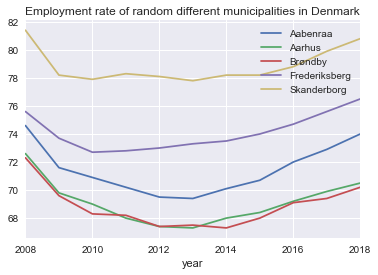

In [12]:
#Here we constructs different graph to see the immediate relations and development of the variables
Employment_Aabenraa_mv = Tabel2[Tabel2['municipality'].isin(['Aabenraa', 'Aarhus', 'København', 'Brøndby', 'Skanderborg', 'Frederiksberg'])] 

def plot(fig):
    fig_employ_muni = fig.set_index('year')
    fig_employ_muni.groupby(['municipality'])['employment rate'].plot(legend=True, grid=True, title='Employment rate of random different municipalities in Denmark');

plot(Employment_Aabenraa_mv)


 

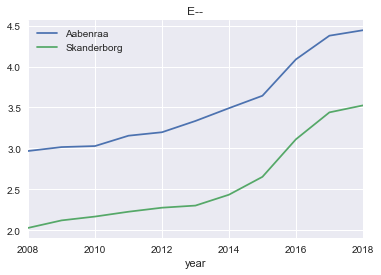

In [13]:
#Here we constructs different graph to see the immediate relations and development of the variables
Immigrants_Aabenraa_mv1 = Tabel2[Tabel2['municipality'].isin(['Aabenraa', 'Skanderborg'])] 

def plot(fig):
    fig_employ = fig.set_index('year')
    fig_employ.groupby(['municipality'])['Immigrants ratio'].plot(legend=True, grid=True, title='E--');

plot(Immigrants_Aabenraa_mv1)

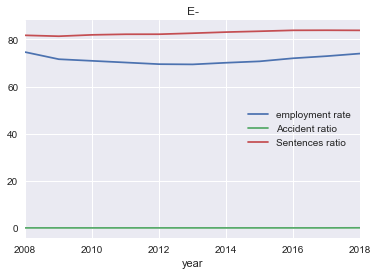

In [14]:
#Here we constructs different graph to see the immediate relations and development of the variables
Emp_acci_sent = Tabel2[Tabel2['municipality'].isin(['Aabenraa'])] 

def plot(fig):
    fig_employ = fig.set_index('year')
    fig_employ.groupby(['municipality'])['employment rate', 'Accident ratio', 'Sentences ratio'].plot(legend=True, grid=True, title='E-');

plot(Emp_acci_sent)


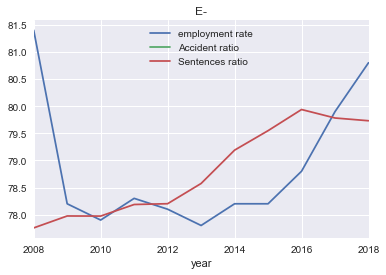

In [15]:
#Here we constructs different graph to see the immediate relations and development of the variables
Emp_acci_sent = Tabel2[Tabel2['municipality'].isin(['Skanderborg'])] 

def plot(fig):
    fig_employ = fig.set_index('year')
    fig_employ.groupby(['municipality'])['employment rate', 'Accident ratio', 'Sentences ratio'].plot(legend=True, grid=True, title='E-');

plot(Emp_acci_sent)

In [16]:
# Import figure from bokeh.plotting
import numpy as np
from bokeh.io import push_notebook, show, output_notebook, curdoc
from bokeh.layouts import row, widgetbox, column, gridplot
from bokeh.plotting import figure
from bokeh.models import Dropdown, Select, ColumnDataSource, HoverTool
output_notebook()



source = ColumnDataSource(Tabel2)
hover = HoverTool(tooltips=[('municipality', '@municipality')])


# Below is used to print text in bold
BOLD = '\033[1m'
END = '\033[0m'

# Create plot
print(BOLD + 'employment rate'+ END)
f1 = figure(x_axis_label ='Avg disp income', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f1.circle('Avg disp income', 'employment rate', source=source)
f1.add_tools(hover)

f2 = figure(x_axis_label ='Immigrants ratio', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f2.circle('Immigrants ratio', 'employment rate', source=source)
f2.add_tools(hover)

f3 = figure(x_axis_label ='Sentences ratio', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f3.circle('Sentences ratio', 'employment rate', source=source)
f3.add_tools(hover)

f4 = figure(x_axis_label ='Accident ratio', y_axis_label ='employment rate', plot_width=325, plot_height=275)
f4.circle('Accident ratio', 'employment rate', source=source)
f4.add_tools(hover)

# Display the plot
show(gridplot([[f1,f2],[f3,f4]]))


Loading BokehJS ...

employment rate


The plots above show a positive correlation between the avg. disposable income and employment rate independent of the municipalities. Furthermore we can see, that there is a negativ correlation between the sentences ratio and the employment rate. It is harder to see a correlation between the accident ratio and the employment rate together with the immigrations ratio and the employment rate. A weak conclusion could be that there is ... correlation between the immigration ratio and the employment rate.

4. **Conclusion**